<a href="https://colab.research.google.com/github/mov-z/LLM-Tutorials/blob/main/examples/Open_source_LLM_with_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Huggingface를 이용한 Open-source LLM 예제**

**Huggingface**를 이용해 **Open-source** **LLM**을 사용하는 기본적인 예제입니다.
Colab GPU 메모리 한계가 있으니, 한 번의 런타임에 하나의 모델만 테스트해 보시는 걸 추천드립니다.

- 예제 모델: Google Gemma, Meta Llama

## **1. 환경 세팅**
- 필요 라이브러리 설치
- Huggingface API access token 입력

In [ ]:
# 필요한 패키지 설치
!pip install -q transformers

In [ ]:
import transformers
import torch
from transformers import pipeline
from IPython.display import Markdown, display

def get_response_gemma(pipe, messages, max_new_tokens=256):
  outputs = pipe(messages, max_new_tokens=max_new_tokens)
  assistant_response = outputs[0]["generated_text"][-1]["content"].strip()
  return assistant_response

def get_response_llama2(prompt, max_length=256):
    generated = pipe_llama(prompt, max_length=max_length, num_return_sequences=1)
    return generated[0]['generated_text']

### Huggingface 모델 사용 권한 인증

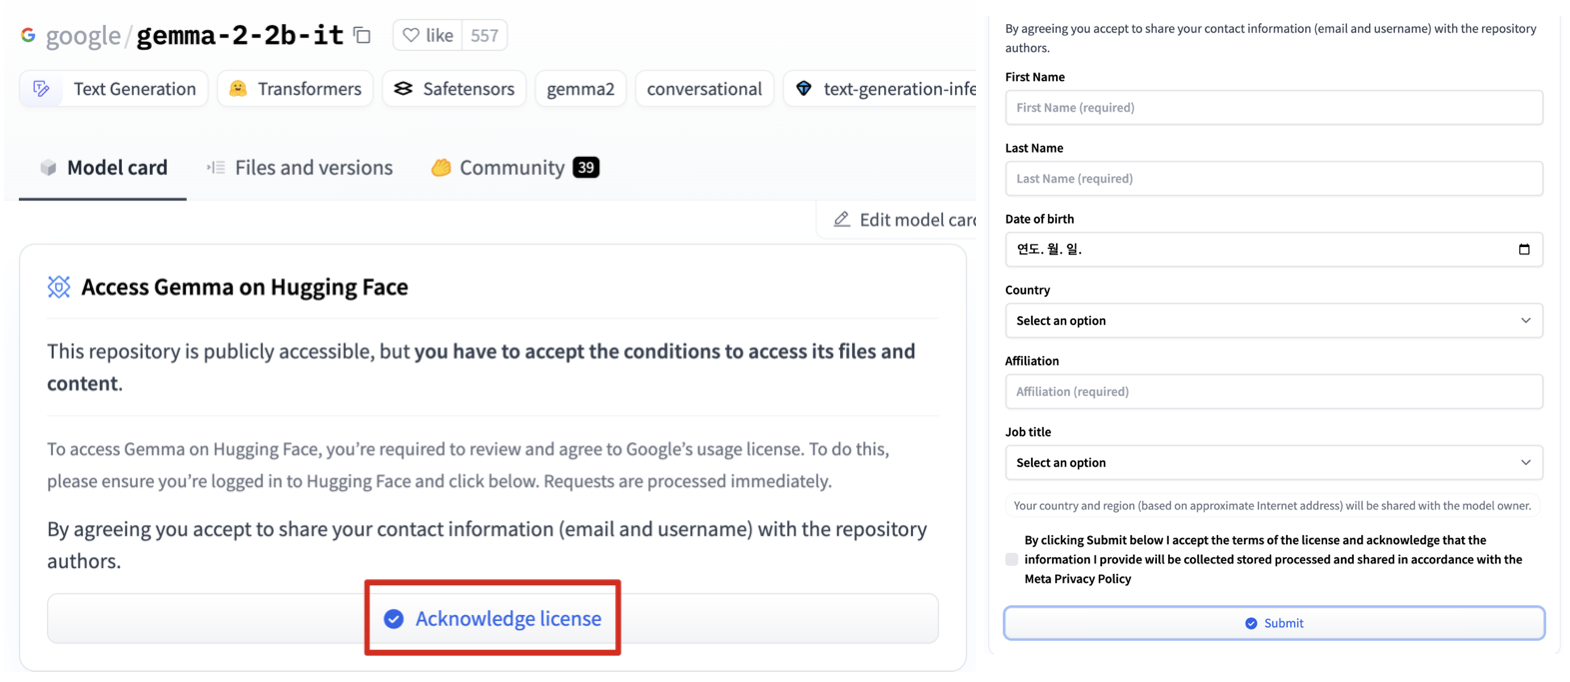

- Huggingface의 일부 모델은 사용하기 위해 인증 절차가 필요
- Huggingface에서 사용할 모델을 찾아 간단한 인증 절차를 거치면 일정 시간 후 승인 됨

In [ ]:
# Huggingface Access Tokens - Huggingface > settings > Access Tokens
# Huggingface에 API 토큰을 저장하고 로그인
from huggingface_hub import login
from getpass import getpass

# Hugging Face API 토큰 입력
hf_token = getpass("Hugging Face API 토큰을 입력하세요: ")
login(token=hf_token)

Hugging Face API 토큰을 입력하세요: ··········
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!nvidia-smi

Sat Sep 21 09:27:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2. Google Gemma**
- Google의 오픈소스 LLM인 **Gemma**
- google/gemma-2-2b-it
- 2B parameters 모델이라 **코랩 GPU** 환경에서 구동

In [ ]:
pipe_gemma = pipeline(
    "text-generation",
    model="google/gemma-2-2b-it",
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="cuda",  # replace with "mps" to run on a Mac device
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
messages = [
    {"role": "user", "content": "LLM에 대해 설명해줄래?"},
]

response = get_response_gemma(pipe_gemma, messages)
Markdown(response)

## LLM (Large Language Model) 에 대해 알아보자!

LLM은 **대규모 언어 모델**이라고 불리는 것. 

**쉽게 말해, 엄청난 양의 데이터를 학습하여 사람처럼 말하고 글을 쓰는 컴퓨터 프로그램입니다.** 

**어떤 점이 특별한가요?**

* **엄청난 데이터를 학습:** 
    * 텍스트, 코드, 이미지 등 다양한 형태의 데이터를 학습합니다. 
    * 빅 데이터를 통해 인간의 언어 패턴을 이해하고, 
    * 다양한 언어를 이해하고 생성할 수 있습니다.
* **인간처럼 말하고 글을 쓰는 능력:** 
    * 텍스트 생성, 번역, 요약, 질문 답변 등 다양한 작업을 수행할 수 있습니다.
    * 흥미로운 이야기를 쓰거나, 
    * 긴 글을 요약하거나, 
    * 새로운 정보를 제공하는 등 인간의 언어 능력을 모방합니다.
* **다양한 분

In [ ]:
messages = [
    {"role": "user", "content": "거시 경제에 대해 설명해줘"},
]
response = get_response_gemma(pipe_gemma, messages)
Markdown(response)

## 거시 경제: 세계를 바라본 경제학

거시 경제는 **국제적인 경제 시스템과 전 세계적인 경제적 현상을 다루는 경제학 분야**입니다. 

**핵심 개념:**

* **국제적 경제:** 국제적인 경제 관계, 자본 이동, 상품 및 서비스 교환, 투자, 경제적 협력 등을 포함합니다.
* **전 세계적 경제:** 세계 각국의 경제 성장, 불균형, 경제적 협력, 경제적 위기 등을 다룹니다.
* **경제적 흐름:** 세계 경제의 흐름, 경제적 변화, 경제적 규제, 경제적 협력 등을 분석합니다.

**주요 분야:**

* **국제 경제:** 국제 금융 시스템, 국제 기구, 국제 협력, 국제 경제 정책 등을 다룹니다.
* **경제적 규제:** 국제적 경제 규제, 국제적 경제 협력, 국제적 경제

## **3. Meta Llama**
- Meta의 오픈소스 LLM인 **Llama**
- Llama3.1의 경우 가장 작은 모델이 8B ➡️ 코랩 GPU 메모리 터짐 😢
- 예제에서는 7B 크기인 meta-llama/Llama-2-7b-hf 모델 사용

In [ ]:
# model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
model_id = "meta-llama/Llama-2-7b-hf"

pipe_llama = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="cuda",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
prompt = "Explain the Python language"
output = get_response_llama2(prompt)

print(output)

Explain the Python language in 5 minutes
Python is a general-purpose, high-level programming language. Its design philosophy emphasizes code readability with its notable use of significant indentation. Python supports multiple programming paradigms, including object-oriented, imperative, functional, and procedural styles.
Python is an interpreted language, meaning that code is executed on the fly without compiling. This makes it a popular choice for scripting and rapid prototyping.
Python has a large and active community of developers, and it is widely used in a variety of fields, including web development, data science, and machine learning.
Python is a high-level programming language that was created in the late 1980s. It is designed to be easy to read and understand, and it is often used for web development and data analysis.
Python is an interpreted language, which means that it is executed on the fly without compiling. This makes it a popular choice for rapid prototyping and scrip

In [ ]:
prompt = "Explain aerobic exercise"
output = get_response_llama2(prompt)

print(output)

Explain aerobic exercise in the human body.
Explain the difference between aerobic and anaerobic exercise.
Describe the benefits of aerobic exercise.
Describe the benefits of anaerobic exercise.
Describe the benefits of strength training.
Explain the benefits of flexibility training.
Explain the importance of stretching.
Describe the benefits of balance training.
Explain the benefits of relaxation training.
Explain the benefits of meditation.
Explain the benefits of visualization.
Explain the benefits of yoga.
Explain the benefits of Tai Chi.
Explain the benefits of Pilates.
Explain the benefits of swimming.
Explain the benefits of bicycling.
Explain the benefits of running.
Explain the benefits of walking.
Explain the benefits of hiking.
Explain the benefits of dancing.
Explain the benefits of jumping rope.
Explain the benefits of plyometrics.
Explain the benefits of weight training.
Explain the benefits of circuit training.
Explain the benefits of interval training.
Explain the benef